# Выборка #6

In [1]:
%run init.py
%load_ext autoreload
%autoreload 2

### Обзор данных

In [2]:
dataset = Dataset(6)
dataset.summary()

+---------+-----------------------+----------------------+-------------+------------------+
| Выборка | Обучающая, # объектов | Тестовая, # объектов | # признаков | Доля класса 1, % |
+---------+-----------------------+----------------------+-------------+------------------+
|    6    |          1000         |        10000         |     200     |       48.6       |
+---------+-----------------------+----------------------+-------------+------------------+


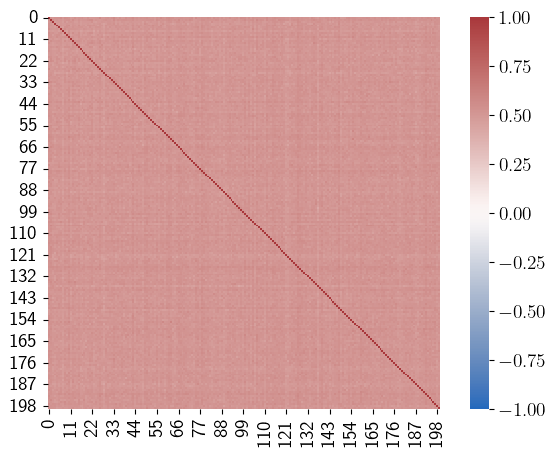

In [3]:
dataset.heatmap()

Рассмотрим дивергенции признаков по классам

In [18]:
D_kls = dataset.divergences(verbose=False)

In [19]:
D_kls[D_kls > 0.3].shape[0]

7

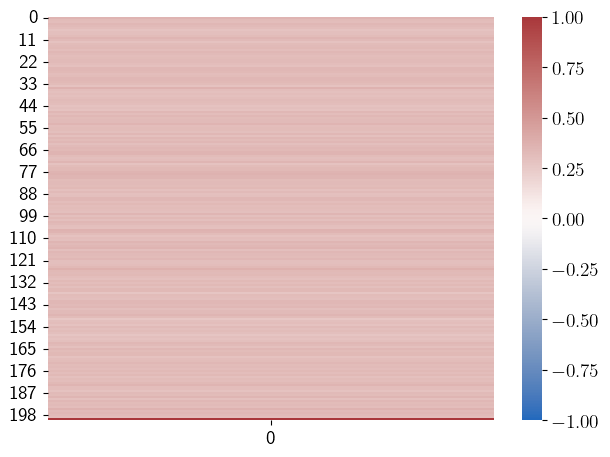

In [20]:
dataset.target_corr(annot=False)

In [21]:
#make_histplot(dataset.df)

### Проверка нормальности признаков

Используем критерий Шапиро-Уилка

In [4]:
pvals = [shapiro(dataset.X1[i])[1] for i in range(dataset.n_features)]

Получим достигаемые уровни значимости для нулевой гипотезы: "Распределение признака является нормальным"

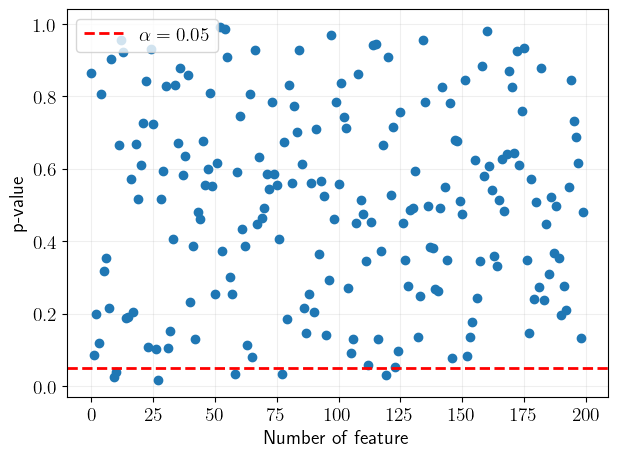

In [5]:
plt.plot(pvals, linestyle='None', marker='o')
plt.axhline(y=0.05, color='r', linestyle='dashed', label=r'$\alpha=0.05$')

plt.legend()
plt.xlabel('Number of feature')
plt.ylabel('p-value')
plt.grid(alpha=0.2)

plt.tight_layout()
plt.savefig(f'./fig/dataset_{dataset.dataset_id}/shapiro.pdf', bbox_inches='tight')
plt.show()

In [24]:
pvals = np.array(pvals)
np.sum(pvals < 0.05) / len(pvals)

0.03

---

### Logistic Regression

100%|██████████| 200/200 [02:10<00:00,  1.53it/s]


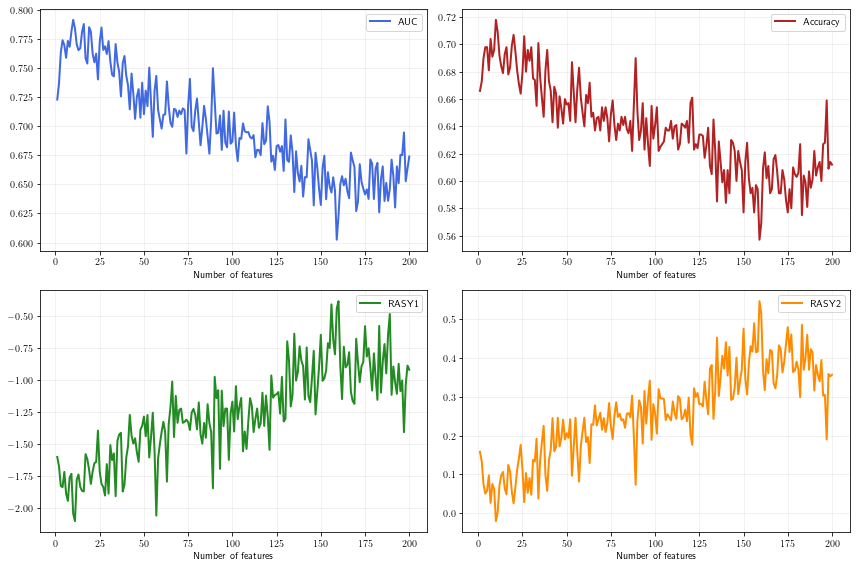

In [11]:
dataset.metrics_n_features_dependence(LogisticRegression(), 
                                      ks=None)

In [7]:
features_lr, cols_lr = dataset.feature_selection(n_cols=5)

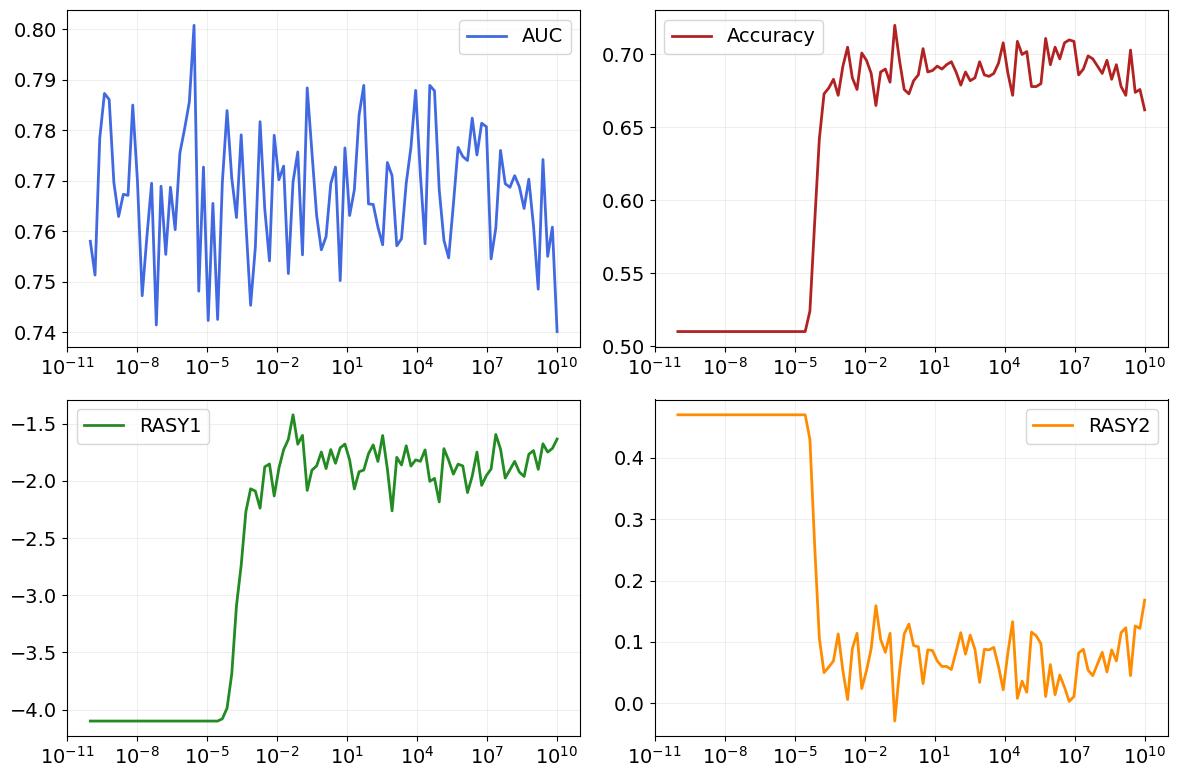

In [8]:
Cs = np.logspace(-10, 10, 100)
LogisticRegressionValidate(dataset, features_lr, Cs)

Попробуем добавить PCA

In [16]:
X = dataset.X_train_scaled

pca = PCA(n_components=7)
X_pca = pca.fit_transform(X)
#print(pca.explained_variance_ratio_)

In [17]:
model = LogisticRegression()
_ = dataset.evaluate(model, X=X_pca, n_splits=10, verbose=True, relative=True,
                 fit_params=None)

+----------+------------------+
|  Metric  | Cross-Validation |
+----------+------------------+
|   AUC    |      0.7346      |
| Accuracy |      0.665       |
|  RASY1   |      -1.331      |
|  RASY2   |      0.177       |
+----------+------------------+


### Наивный байес

100%|██████████| 200/200 [00:17<00:00, 11.19it/s]


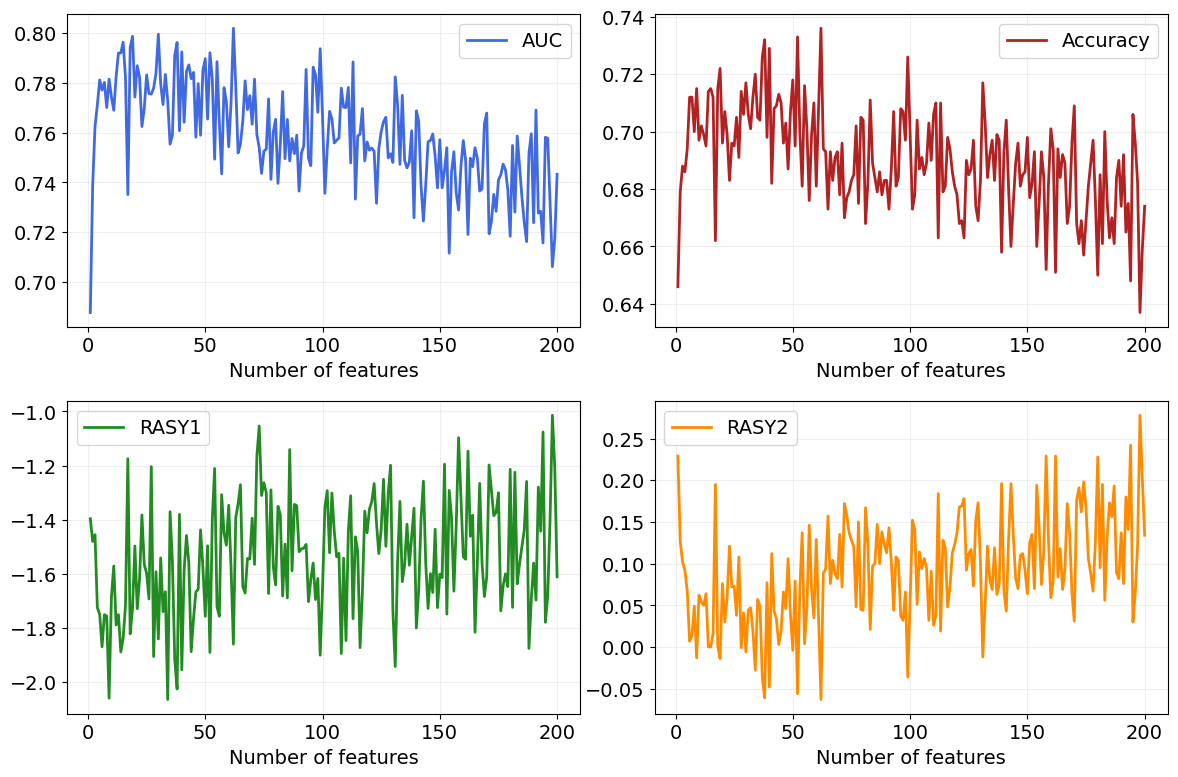

In [9]:
dataset.metrics_n_features_dependence(GaussianNB())

In [19]:
features_bayes, cols_bayes = dataset.feature_selection(n_cols=10)

PCA

In [35]:
X = dataset.X_train_scaled

pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)
#print(pca.explained_variance_ratio_)

In [36]:
model = GaussianNB()
_ = dataset.evaluate(model, X=X_pca, n_splits=10, verbose=True, relative=True,
                 fit_params=None)

+----------+------------------+
|  Metric  | Cross-Validation |
+----------+------------------+
|   AUC    |      0.7599      |
| Accuracy |      0.681       |
|  RASY1   |      -1.891      |
|  RASY2   |      0.097       |
+----------+------------------+


### CatBoost

In [11]:
fit_params = {"verbose" : False, "plot" : False}

In [18]:
dataset.metrics_n_features_dependence(CatBoostClassifier(), fit_params=fit_params,
                                      ks=range(1, dataset.df.shape[1], 20))

 80%|████████  | 8/10 [04:14<01:03, 31.80s/it]


KeyboardInterrupt: 

In [65]:
features_cb = dataset.feature_selection(n_cols=9)

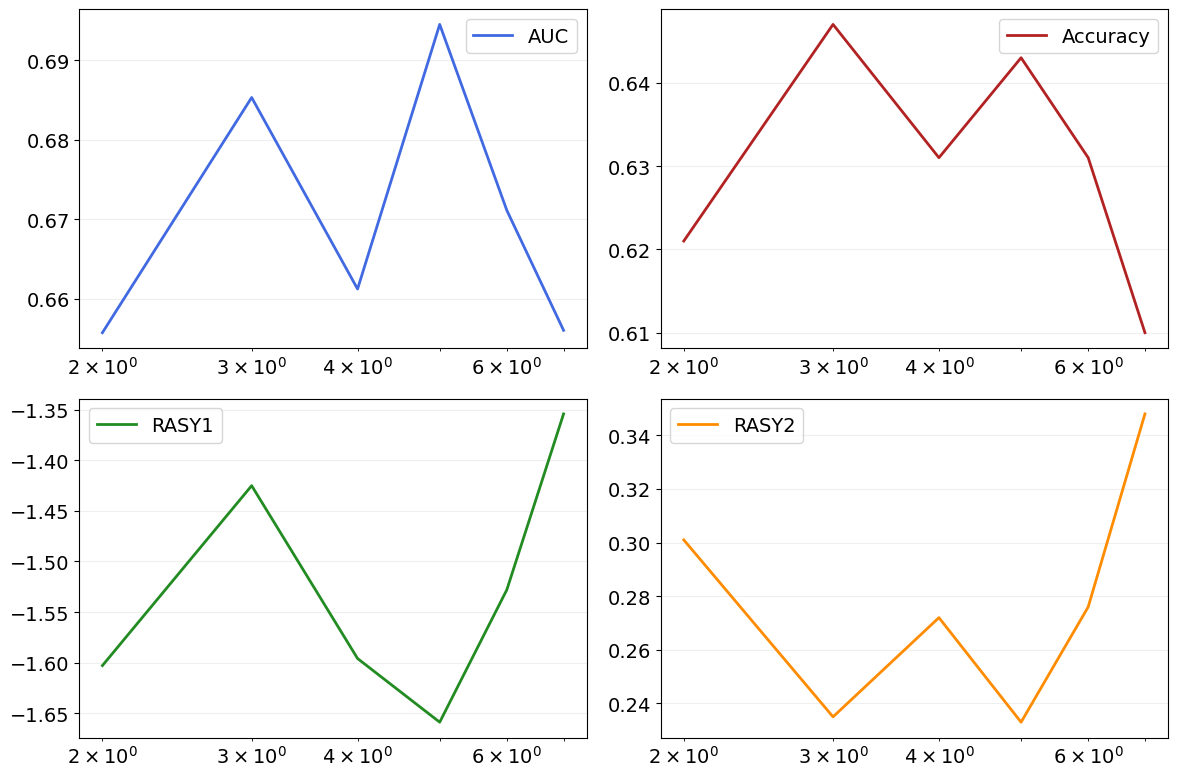

In [67]:
depths = [2, 3, 4, 5, 6, 7]
CatBoostClassifierValidate(dataset, features_cb, depths)

### Saving aswers 

In [20]:
model_auc = GaussianNB()
model_acc = GaussianNB()
model_rasy1 = LogisticRegression(C=1e-8)
model_rasy2 = GaussianNB()
models = [model_auc, model_acc, model_rasy1, model_rasy2]

In [21]:
features_auc, cols_auc = features_bayes, cols_bayes
features_acc, cols_acc = features_lr, cols_lr
features_rasy1, cols_rasy1 = features_bayes, cols_bayes
features_rasy2, cols_rasy2 = features_bayes, cols_bayes
features_list = [features_auc, features_acc, features_rasy1, features_rasy2]
cols_list = [cols_auc, cols_acc, cols_rasy1, cols_rasy2]

In [22]:
dataset.save_ans(models, features_list, cols_list)

---

### Logistic Regression

100%|██████████| 200/200 [01:37<00:00,  2.05it/s]


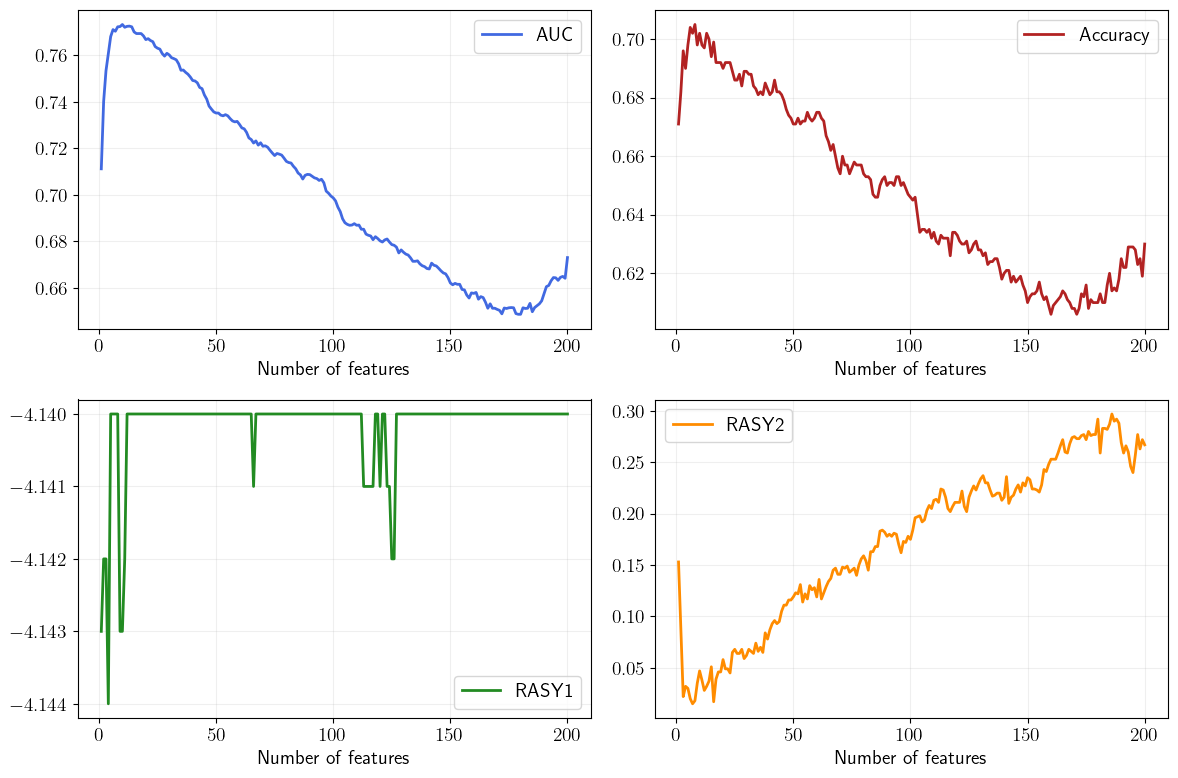

In [25]:
features_cols_lr = dataset.metrics_n_features_dependence(LogisticRegression())

100%|██████████| 11/11 [00:07<00:00,  1.50it/s]


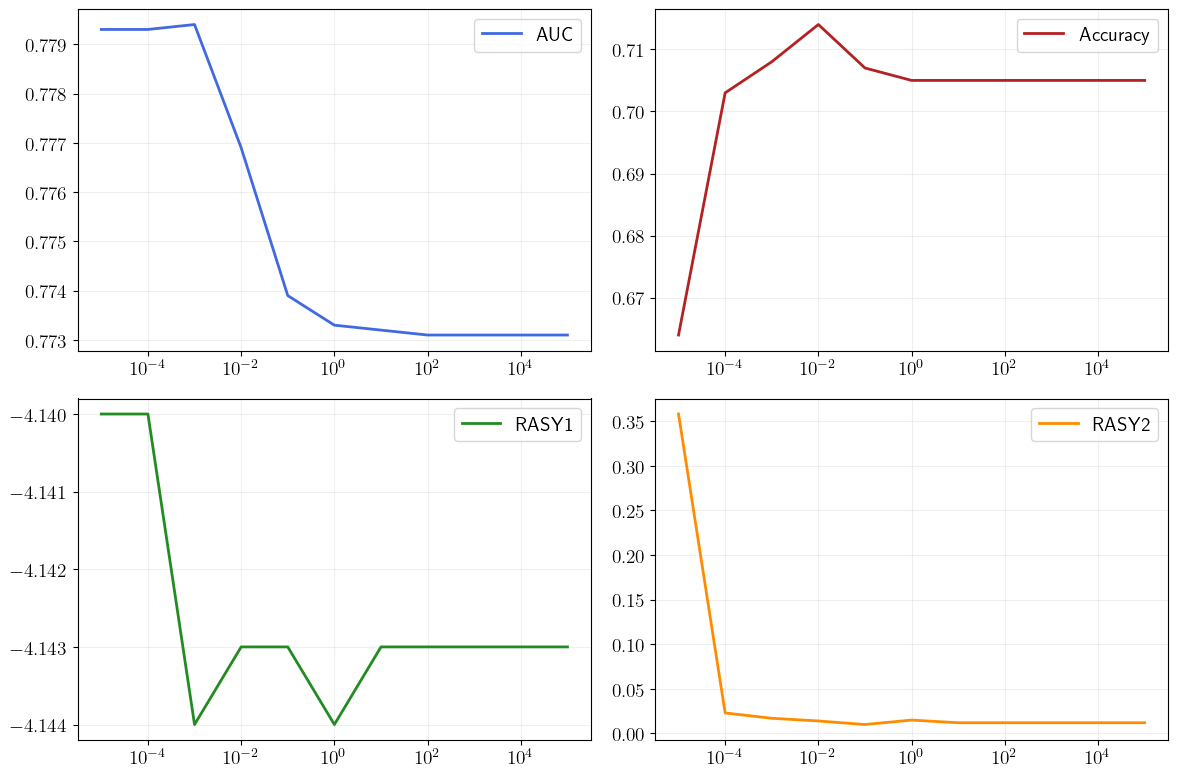

In [26]:
Cs_lr = LogisticRegressionValidate(dataset, features_cols_lr, np.logspace(-5, 5, 11))

### Naive Bayes

100%|██████████| 200/200 [01:10<00:00,  2.84it/s]


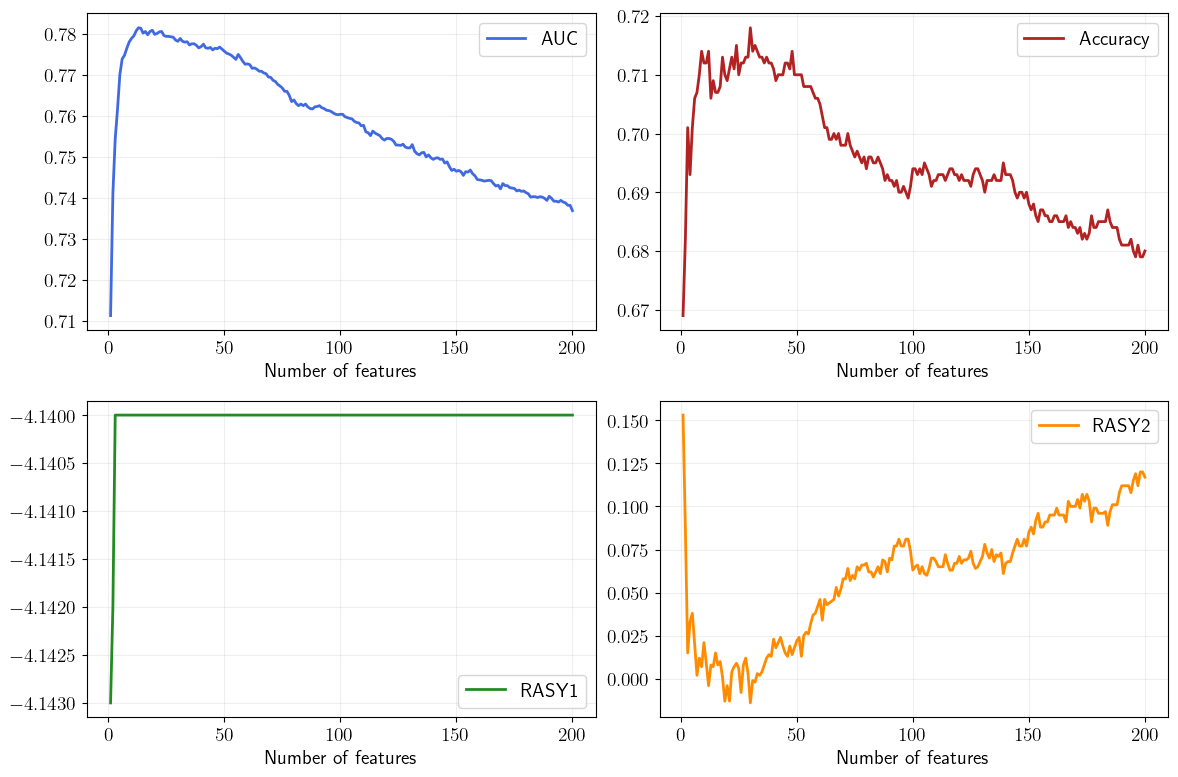

In [6]:
features_cols_gnb = dataset.metrics_n_features_dependence(GaussianNB())

### Saving aswers 

In [7]:
model_AUC = GaussianNB()
model_Accuracy = GaussianNB()
model_RASY1 = GaussianNB()
model_RASY2 = GaussianNB()
models = [model_AUC, model_Accuracy, model_RASY1, model_RASY2]

In [8]:
features_AUC, cols_AUC = features_cols_gnb['AUC']['features'], features_cols_gnb['AUC']['cols']
features_Accuracy, cols_Accuracy = features_cols_gnb['Accuracy']['features'], features_cols_gnb['Accuracy']['cols']
features_RASY1, cols_RASY1 = features_cols_gnb['RASY1']['features'], features_cols_gnb['RASY1']['cols']
features_RASY2, cols_RASY2 = features_cols_gnb['RASY2']['features'], features_cols_gnb['RASY2']['cols']
features_list = [features_AUC, features_Accuracy, features_RASY1, features_RASY2]
cols_list = [cols_AUC, cols_Accuracy, cols_RASY1, cols_RASY2]

In [9]:
t_Accuracy = features_cols_gnb['Accuracy']['t']
t_RASY1 = features_cols_gnb['RASY1']['t']
t_RASY2 = features_cols_gnb['RASY2']['t']
thresholds_list = [t_Accuracy, t_RASY1, t_RASY2]

In [31]:
dataset.save_ans(models, features_list, cols_list, thresholds_list)

In [16]:
cols_list[2]

array([195], dtype=int64)

In [15]:
len(cols_list[3])

30

In [11]:
thresholds_list

[0.7171717171717172, 0.8787878787878789, 0.7272727272727273]